In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deepsub_result = pd.read_csv("./output/groundtruth_and_labels.csv")
deepsub_report = pd.DataFrame(classification_report(deepsub_result["GroundTruth"], deepsub_result["PredictedLabels"], zero_division=0, output_dict=True)).T.round(3)
queen_result = pd.read_csv("./output/queen_report.csv")
queen_result.index = queen_result["Unnamed: 0"]
queen_result = queen_result.drop("Unnamed: 0", axis=1).rename_axis(None).round(3)
queen_result

,precision,recall,f1-score,support
1,0.607,0.774,0.680,4212.0
2,0.838,0.711,0.769,10153.0
3,0.639,0.711,0.673,785.0
4,0.733,0.690,0.711,2295.0
5,0.915,0.305,0.457,141.0
6,0.599,0.700,0.646,1222.0
7,0.250,0.333,0.286,3.0
8,0.150,0.301,0.200,153.0
10,0.864,0.868,0.866,205.0
12,0.361,0.938,0.522,96.0


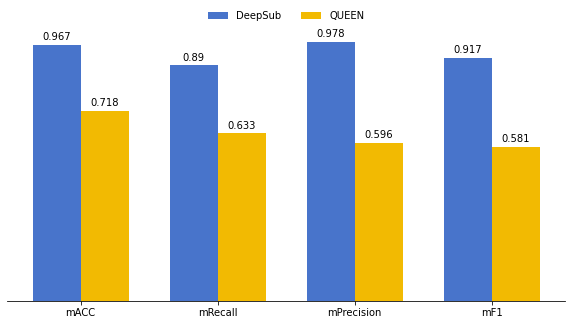

In [3]:
metrics = ['mACC', 'mRecall', 'mPrecision', 'mF1']
deepsub_scores = deepsub_report.T['accuracy']['precision'],deepsub_report.T['macro avg']['recall'],deepsub_report.T['macro avg']['precision'],deepsub_report.T['macro avg']['f1-score']
queen_scores = queen_result.T['micro avg']['precision'],queen_result.T['macro avg']['recall'],queen_result.T['macro avg']['precision'],queen_result.T['macro avg']['f1-score']

x = np.arange(len(metrics))  
width = 0.35  

deepsub_color = (72/255, 116/255, 203/255)  # Normalized blue color
queen_color = (242/255, 186/255, 2/255)     # Normalized orange color

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, deepsub_scores, width, label='DeepSub', color=deepsub_color)
rects2 = ax.bar(x + width/2, queen_scores, width, label='QUEEN', color=queen_color)

def add_value_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(rects1)
add_value_labels(rects2)

ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(loc='upper center',frameon=False, bbox_to_anchor=(0.5, 1.1), ncol=len(metrics))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.set_ticks([])
plt.show()
